## Experimentation with Random Fourier Features

In [80]:
import numpy as np

#solve for alpha st.
#e^(-alpha * context ^ 2) = thresh

context = 10_000
thresh = 0.1
alpha = -np.log(thresh) / (context ** 2)
print(alpha)

2.3025850929940455e-08


In [120]:
def rff_embedding(N, K, alpha):
    """
    Generate RFF-based embedding for integer `n` using `K` dimensions.
    Parameters:
        N (list<int>): list of integers
        K (int): Embedding dimension.
        alpha (float): Gaussian kernel decay parameter.
    Returns:
        np.ndarray: K-dimensional embedding.
    """
    M = K // 2  # Use K/2 pairs of cos and sin
    # Sample frequencies (w) from N(0, 2*alpha)
    w = np.random.normal(0, np.sqrt(2 * alpha), M)
    # Sample random phases (b) from Uniform(0, 2*pi)
    b = np.random.uniform(0, 2 * np.pi, M)
    # Compute embedding using cos(w * n + b) and sin(w * n + b)
    N = np.array(N)
    embedding = np.sqrt(2 / K) * np.concatenate([
        np.cos(np.outer(N, w) + b),
        np.sin(np.outer(N, w) + b)
    ], axis=1)
    return embedding

N = [i for i in range(0, 100_000, 1000)]
K = 2048
embeds = rff_embedding(N, K, alpha)
print(embeds.shape)

(100, 2048)


(100, 100)


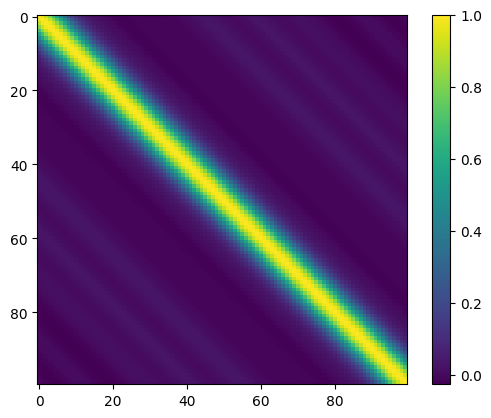

In [121]:
#compute similarities
similarities = embeds @ embeds.T
print(similarities.shape)

from matplotlib import pyplot as plt
plt.imshow(similarities)
plt.colorbar()
plt.show()

(2001,)
(2001,)


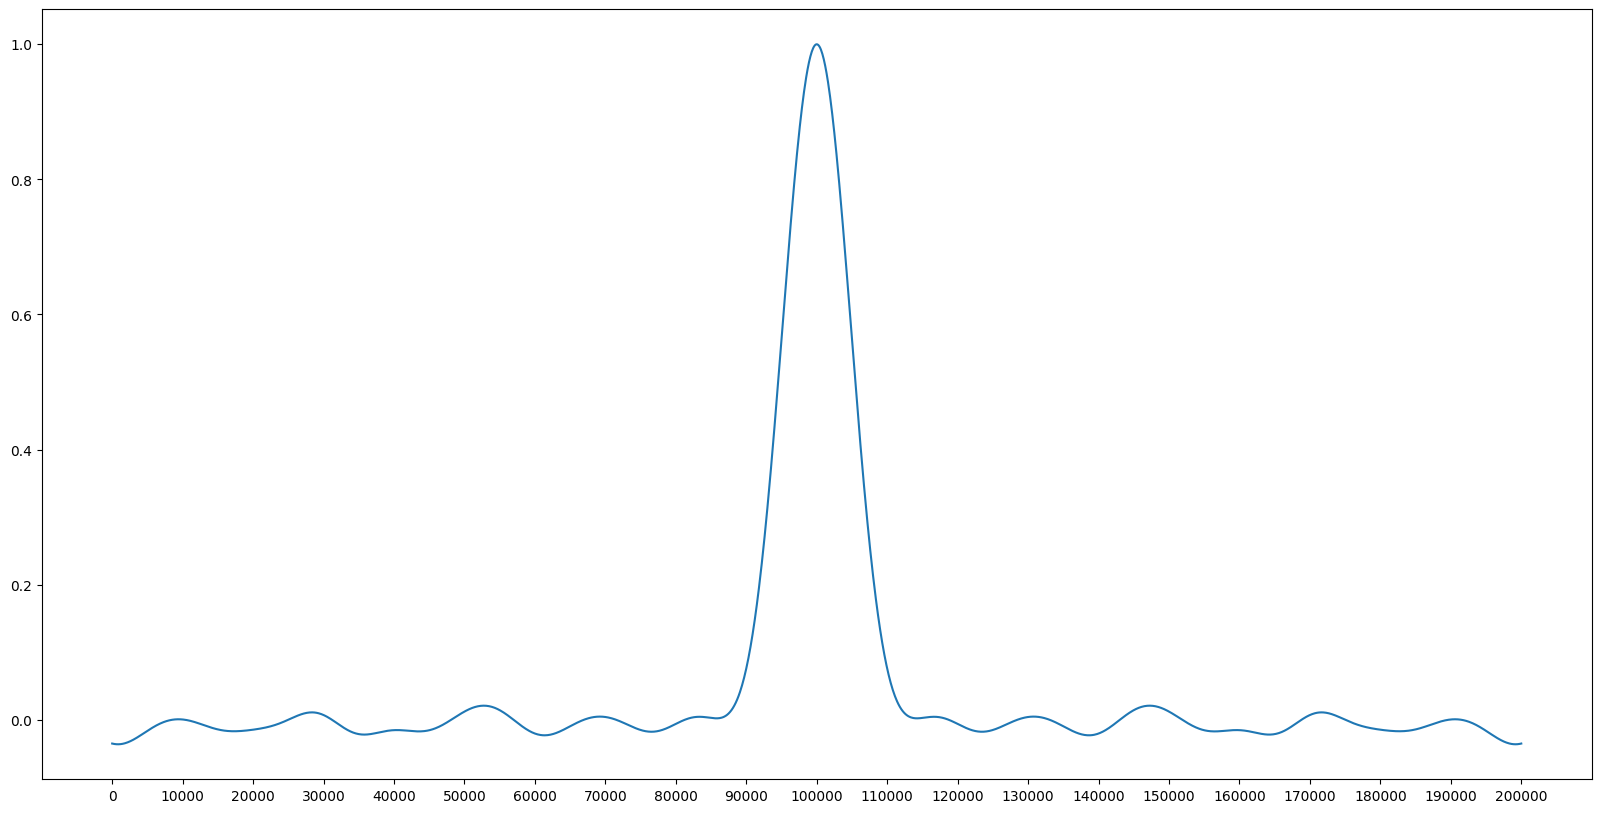

In [122]:
N = [i for i in range(0, 200_001, 100)]
embeds = rff_embedding(N, K, alpha)
chosen = embeds[len(N)//2]

similarities = embeds @ chosen.T
print(similarities.shape)

similarities = similarities.flatten()
print(similarities.shape)

from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(similarities)
#set X axis to be the same as N
locations = range(0, len(N), 100)
plt.xticks(locations, [N[i] for i in locations])
plt.show()